# GRIP February 2022 - The Sparks Foundation

### Data Science & Business Analytics internship

### Task 1-Predict the percentage scored by a student based on the no. of study hours.

### Author - Roshan Kumar

### In given task we have to predict the percentage of marks expected by the student based upon the number of hours they studied.In this task only two variables are involved.

# Importing Libraries

In [5]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# Reading Data From Dataset

In [6]:
#Import the data
url="http://bit.ly/w-data"
data=pd.read_csv(url)
data1=data
print("The data is imported successfully")
data.head(12)

The data is imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Visualising the data for insights

In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Plotting the graph for the data given in dataset

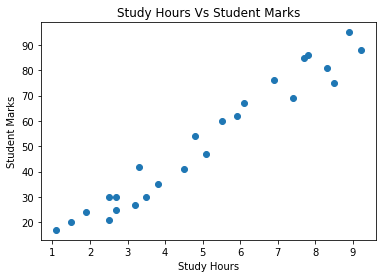

In [8]:
x=data.Hours
y=data.Scores

plt.scatter(x,y)
plt.xlabel('Study Hours')
plt.ylabel('Student Marks')
plt.title('Study Hours Vs Student Marks')
plt.show()

# Data Cleansing

In [9]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Data Splitting

In [10]:
x=data.drop('Scores',axis='columns')
y=data.drop('Hours',axis='columns')
print(x.shape,y.shape)

(25, 1) (25, 1)


In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)

In [12]:
print("shape of X Train",x_train.shape)
print("shape of Y Train",y_train.shape)
print("shape of X Test", x_test.shape)
print("shape of Y Test",y_test.shape)

shape of X Train (20, 1)
shape of Y Train (20, 1)
shape of X Test (5, 1)
shape of Y Test (5, 1)


# Training

In [14]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

print('Trained the algorithm')

Trained the algorithm


# Plot the regression line

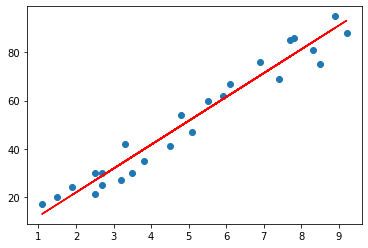

In [15]:
m=lr.coef_
c=lr.intercept_

reg_line= m *x_train + c

plt.scatter(x,y)
plt.plot(x_train, reg_line, color='red')
plt.show()

# Comparison between Actual and Predicted

In [17]:

y_pred=lr.predict(x_test)
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [18]:

df= pd.DataFrame(np.c_[y_test,y_pred],columns=['Actual Score','Predicted Score'])
df

,Actual Score,Predicted Score
0,20.0,16.884145
1,27.0,33.732261
2,69.0,75.357018
3,30.0,26.794801
4,62.0,60.491033


# Testing of sample data 

In [19]:
hours= 9.52
print('Predicted score for 9.52 hours is:' ,lr.predict([[hours]])[0][0].round(2))

Predicted score for 9.52 hours is: 96.37


# Model Evaluation

In [20]:
print('Mean Absolute Error',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error',np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

Mean Absolute Error 4.183859899002975
Mean Squared Error 21.5987693072174
Root Mean Squared Error 2.0454485813637495


In [22]:
print('Accuracy of the Model:', lr.score(x_test,y_test)* 100)

Accuracy of the Model: 94.54906892105356
